In [32]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [20]:
df = pd.read_csv("combined_rainfall_discharge_gauge.csv")
df = df[["Date", "StID_y", "discharge", "guage", "rainfall_107"]]

In [23]:
df.columns = ["date", "stid", "guage", 'discharge', 'rainfall']
combined = df 
combined.head()


,date,stid,guage,discharge,rainfall
0,2007-10-01,RA107,23.2,2.39,0.0
1,2007-10-01,RA107,22.6,2.38,0.0
2,2007-10-01,RA107,21.9,2.37,0.0
3,2007-10-01,RA107,20.6,2.35,0.0
4,2007-10-01,RA107,18.9,2.32,0.0


In [24]:
combined.columns = combined.columns.str.lower()
combined = combined[['date', 'stid', 'guage', 'discharge', 'rainfall']]
combined = combined.rename(columns={'guage': 'gauge', 'rainfall': 'rainfall_inches'})
combined.head()

,date,stid,gauge,discharge,rainfall_inches
0,2007-10-01,RA107,23.2,2.39,0.0
1,2007-10-01,RA107,22.6,2.38,0.0
2,2007-10-01,RA107,21.9,2.37,0.0
3,2007-10-01,RA107,20.6,2.35,0.0
4,2007-10-01,RA107,18.9,2.32,0.0


In [25]:
combined['rainfall_ft'] = round(combined['rainfall_inches']/12, 2)
combined['date'] = pd.to_datetime(combined['date'], infer_datetime_format=True)

In [27]:
combined.describe()

,gauge,discharge,rainfall_inches,rainfall_ft
count,131199.000000,131199.000000,131199.000000,131199.000000
mean,160.276956,3.242591,0.005937,0.000388
std,213.167199,0.758934,0.036788,0.003111
min,10.100000,2.170000,0.000000,0.000000
25%,58.400000,2.770000,0.000000,0.000000
50%,103.000000,3.080000,0.000000,0.000000
75%,179.000000,3.470000,0.000000,0.000000
max,5820.000000,15.120000,2.060000,0.170000


In [28]:
combined.corr()

/var/folders/23/9yyjjc7d5qzgg1rk2yt_yhwc0000gn/T/ipykernel_2118/1643169363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  combined.corr()


,gauge,discharge,rainfall_inches,rainfall_ft
gauge,1.000000,0.951102,0.162009,0.150434
discharge,0.951102,1.000000,0.169425,0.155534
rainfall_inches,0.162009,0.169425,1.000000,0.968311
rainfall_ft,0.150434,0.155534,0.968311,1.000000


In [33]:
daily_max = combined.groupby(by='date').max().reset_index()
daily_max.head()

,date,stid,gauge,discharge,rainfall_inches,rainfall_ft
0,2007-10-01,RA107,23.9,2.40,0.0,0.0
1,2007-10-02,RA107,23.2,2.39,0.0,0.0
2,2007-10-03,RA107,23.2,2.39,0.0,0.0
3,2007-10-04,RA107,23.2,2.39,0.0,0.0
4,2007-10-05,RA107,25.2,2.42,0.0,0.0


In [34]:
op_limit = daily_max[daily_max['gauge'] >= 0.5]
print(op_limit.shape)
op_limit.head()

(5477, 6)


,date,stid,gauge,discharge,rainfall_inches,rainfall_ft
0,2007-10-01,RA107,23.9,2.40,0.0,0.0
1,2007-10-02,RA107,23.2,2.39,0.0,0.0
2,2007-10-03,RA107,23.2,2.39,0.0,0.0
3,2007-10-04,RA107,23.2,2.39,0.0,0.0
4,2007-10-05,RA107,25.2,2.42,0.0,0.0


In [48]:
# Minimum is already a flood level! Does this even count as a flood?
combined['gauge'].min()

10.1

In [62]:
# fliters to only show dates where water was above the 75 percentile for gauage
flood_filter = np.where(daily_max['gauge'] > 179.000000)
flood = daily_max.loc[flood_filter]
print(flood.shape)
flood

(1822, 6)


,date,stid,gauge,discharge,rainfall_inches,rainfall_ft
9,2007-10-10,RA107,297.0,4.08,0.03,0.00
26,2007-10-27,RA107,970.0,6.56,0.97,0.08
27,2007-10-28,RA107,378.0,4.43,0.00,0.00
63,2007-12-03,RA107,343.0,4.28,0.21,0.02
73,2007-12-13,RA107,361.0,4.36,0.16,0.01
...,...,...,...,...,...,...
5459,2022-10-05,RA107,372.0,4.21,0.05,0.00
5460,2022-10-06,RA107,261.0,3.80,0.00,0.00
5461,2022-10-07,RA107,190.0,3.52,0.00,0.00
5467,2022-10-13,RA107,202.0,3.57,0.19,0.02


In [63]:
flood.describe()

,gauge,discharge,rainfall_inches,rainfall_ft
count,1822.000000,1822.000000,1822.000000,1822.000000
mean,475.272228,4.479616,0.114704,0.009286
std,418.505064,1.131495,0.202514,0.017110
min,181.000000,3.430000,0.000000,0.000000
25%,242.250000,3.740000,0.000000,0.000000
50%,348.000000,4.130000,0.020000,0.000000
75%,543.750000,4.807500,0.160000,0.010000
max,5820.000000,15.120000,2.060000,0.170000


In [64]:
prc_25 = 242.250000
prc_50 = 348.000000
prc_75 = 543.750000
max = 5820.000000	

In [65]:
# Minor flood stage
minor_filter = np.where((daily_max['gauge'] >= prc_25) & (daily_max['gauge'] < prc_50))
minor_flood = daily_max.loc[minor_filter]
print(minor_flood.shape)
minor_flood.head()

(454, 6)


,date,stid,gauge,discharge,rainfall_inches,rainfall_ft
9,2007-10-10,RA107,297.0,4.08,0.03,0.00
63,2007-12-03,RA107,343.0,4.28,0.21,0.02
74,2007-12-14,RA107,258.0,3.90,0.00,0.00
83,2007-12-23,RA107,343.0,4.28,0.33,0.03
84,2007-12-24,RA107,329.0,4.22,0.01,0.00


In [66]:
# Moderate flood stage
moderate_filter = np.where((daily_max['gauge'] >= prc_50) & (daily_max['gauge'] < prc_75))
moderate_flood = daily_max.loc[moderate_filter]
print(moderate_flood.shape)
moderate_flood.head()

(456, 6)


,date,stid,gauge,discharge,rainfall_inches,rainfall_ft
27,2007-10-28,RA107,378.0,4.43,0.00,0.00
73,2007-12-13,RA107,361.0,4.36,0.16,0.01
77,2007-12-17,RA107,366.0,4.38,0.00,0.00
89,2007-12-29,RA107,442.0,4.69,0.31,0.03
91,2007-12-31,RA107,429.0,4.64,0.21,0.02


In [67]:
# Major flood stage
major_filter = np.where(daily_max['gauge'] > prc_75)
major_flood = daily_max.loc[major_filter]
print(major_flood.shape)
major_flood.head()

(456, 6)


,date,stid,gauge,discharge,rainfall_inches,rainfall_ft
26,2007-10-27,RA107,970.0,6.56,0.97,0.08
76,2007-12-16,RA107,573.0,5.19,0.23,0.02
123,2008-02-01,RA107,850.0,6.17,0.43,0.04
124,2008-02-02,RA107,803.0,6.01,0.00,0.00
135,2008-02-13,RA107,1090.0,6.93,0.26,0.02


In [80]:
daily_max["category"] = "Not Flood"

filters = [minor_filter, moderate_filter, major_filter]
values = ['Minor', 'Moderate', 'Major']

for filter, value in zip(filters, values):
    for idx in filter:
        daily_max["category"].loc[idx] = value
    
daily_max['category'].unique()

array(['Not Flood', 'Minor', 'Major', 'Moderate'], dtype=object)

In [83]:
import seaborn as sns

<AxesSubplot: xlabel='date', ylabel='gauge'>

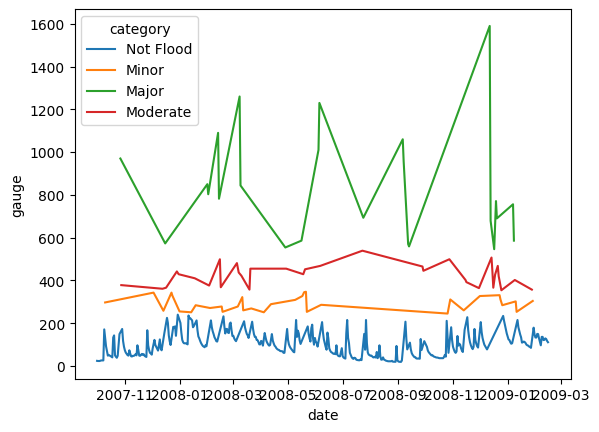

In [87]:
sns.lineplot(x='date', y='gauge', hue='category', data=daily_max[:500])

In [53]:
combined.describe()


,gauge,discharge,rainfall_inches,rainfall_ft
count,131199.000000,131199.000000,131199.000000,131199.000000
mean,160.276956,3.242591,0.005937,0.000388
std,213.167199,0.758934,0.036788,0.003111
min,10.100000,2.170000,0.000000,0.000000
25%,58.400000,2.770000,0.000000,0.000000
50%,103.000000,3.080000,0.000000,0.000000
75%,179.000000,3.470000,0.000000,0.000000
max,5820.000000,15.120000,2.060000,0.170000


In [56]:
# hurricane irene
max = combined["gauge"].max()
combined[combined["gauge"] == max]

,date,stid,gauge,discharge,rainfall_inches,rainfall_ft
34070,2011-08-28,RA107,5820.0,15.12,0.0,0.0
34071,2011-08-28,RA107,5820.0,15.12,0.0,0.0


In [ ]:
### to do 
# Documentation 
# upload to github 
# gauage increase over the years? 